In [76]:
!pip install networkx

import numpy as np
import pandas as pd

fdate = 'imf'
df = pd.read_csv(fdate + '.csv')
df.head()

# Only showing relevant columns
df = df[['COUNTRY','INDICATOR','COUNTERPART_COUNTRY','2016','2017','2018','2019','2020','2021','2022','2023','2024']]

# Attempted to display average
#year_cols = [str(y) for y in range(2016, 2025)]
#imf['weight'] = imf[year_cols].mean(axis=1)

#for _, row in imf.iterrows():
    #G.add_edge(row['COUNTRY'], row['COUNTERPART_COUNTRY'], weight=row['weight'])

df.head()

,COUNTRY,INDICATOR,COUNTERPART_COUNTRY,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Germany,"Trade balance goods, US dollar",Canada,6756.363613,7151.797976,7485.387701,6762.009773,5499.337013,6620.144934,7062.178536,8588.616162,8406.072566
1,Germany,"Trade balance goods, US dollar",Italy,10205.476014,11042.412351,11148.923507,10893.812786,6275.607356,10324.491711,14537.402092,13542.323726,12926.802909
2,Germany,"Trade balance goods, US dollar",United Kingdom,51733.531778,49439.465749,48962.766803,43234.778099,33168.871596,44788.161876,41438.758018,51729.458116,54915.326503
3,Italy,"Trade balance goods, US dollar",Germany,-8013.596252,-11070.116947,-14154.104794,-11255.800723,-6027.659139,-11145.586745,-13022.625946,-14205.787838,-15107.449116
4,Germany,"Trade balance goods, US dollar",United States,70357.762539,75094.461712,77909.186801,73036.266726,60829.825663,81240.676277,90042.577746,92640.697628,99821.331840


In [78]:
import networkx as nx
import matplotlib.pyplot as plt


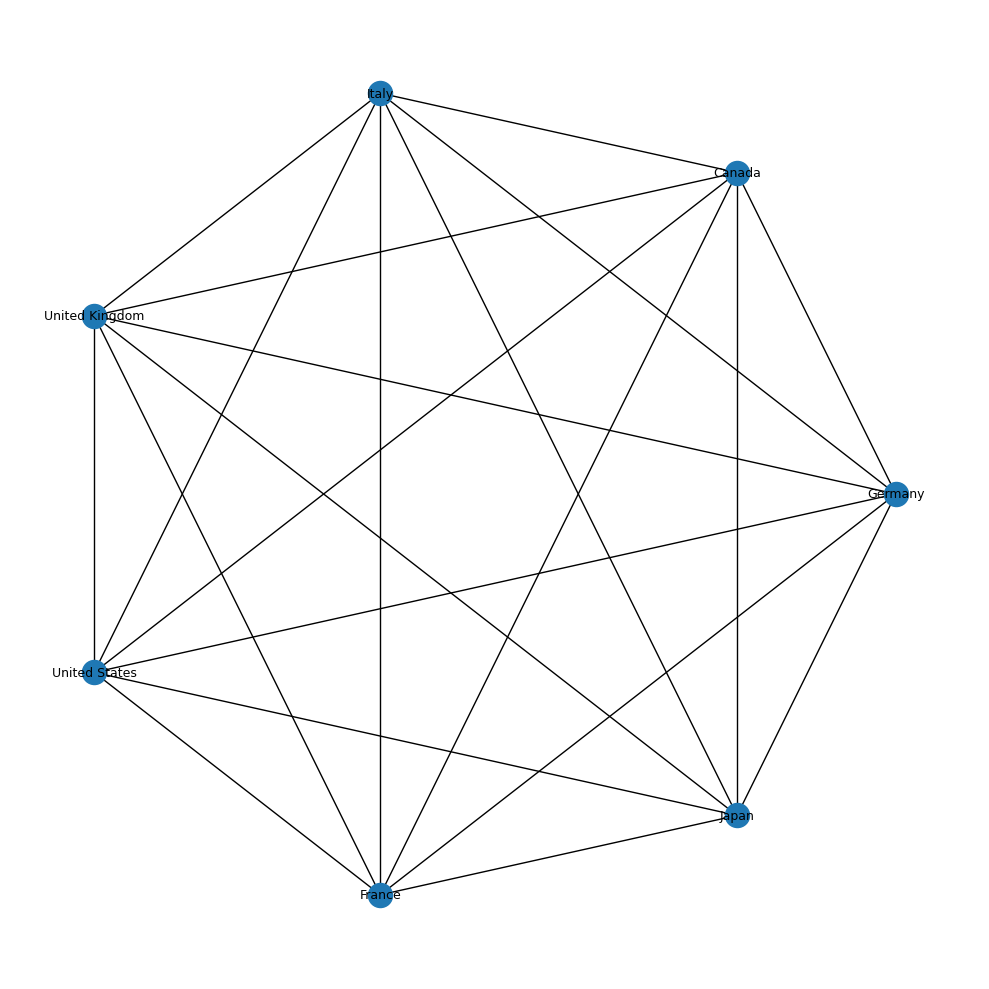

In [80]:
# Circular - 2024
G = nx.Graph()
imf = pd.read_csv('imf.csv')

for index, row in imf.iterrows():
    G.add_edge(row['COUNTRY'], row['COUNTERPART_COUNTRY'], weight=row['2024'])

# remove isolated vertices (if any)    
remove = [node for node,degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)


#Setting size and colours
options = {
'node_color': 'lightblue',
 'edge_color': 'lightblue',
 'node_size': 1,
'width': 1,
'alpha': 1.0,
}

# circular
plt.subplots(figsize=(10,10))
pos=nx.circular_layout(G)
nx.draw(G, pos=pos, font_size = 9)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.axis('off')
plt.show()

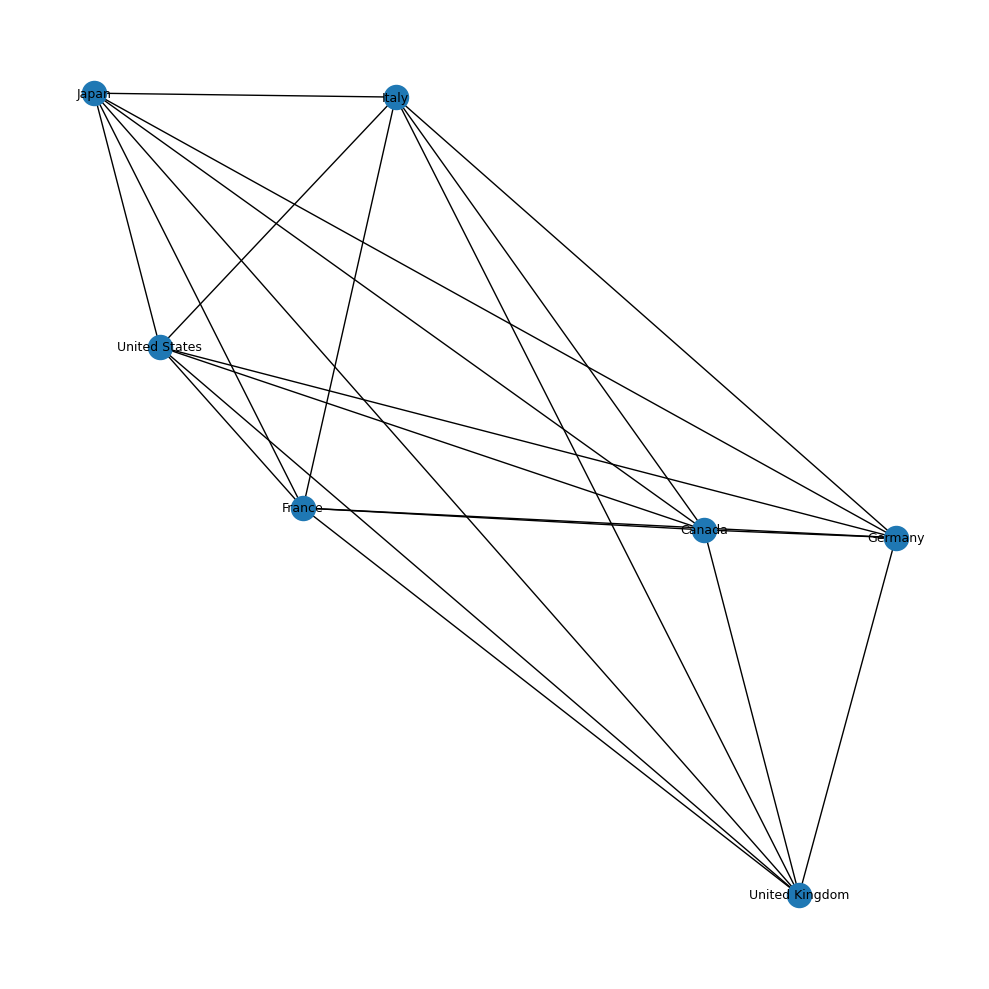

In [82]:
# random 
plt.subplots(figsize=(10,10))
pos=nx.random_layout(G)
nx.draw(G,pos=pos,font_size=9) 
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_1652/2961922679.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


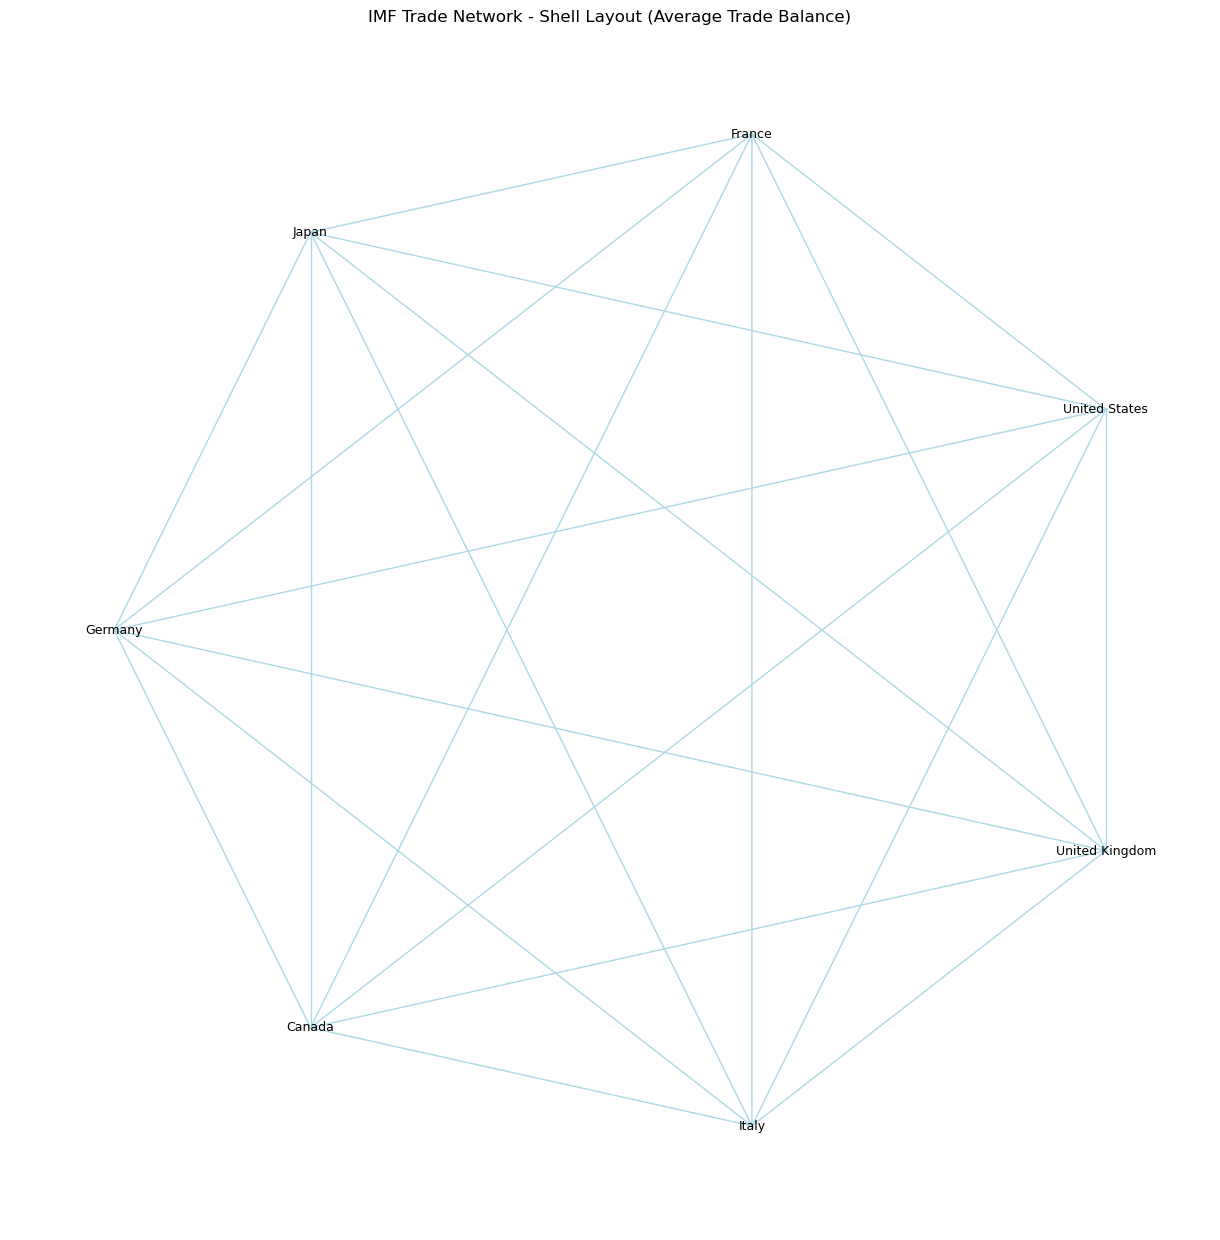

In [84]:
# Shell
pos = nx.shell_layout(G)

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)

plt.title('IMF Trade Network - Shell Layout (Average Trade Balance)')
plt.axis('off')
plt.tight_layout()
plt.show()

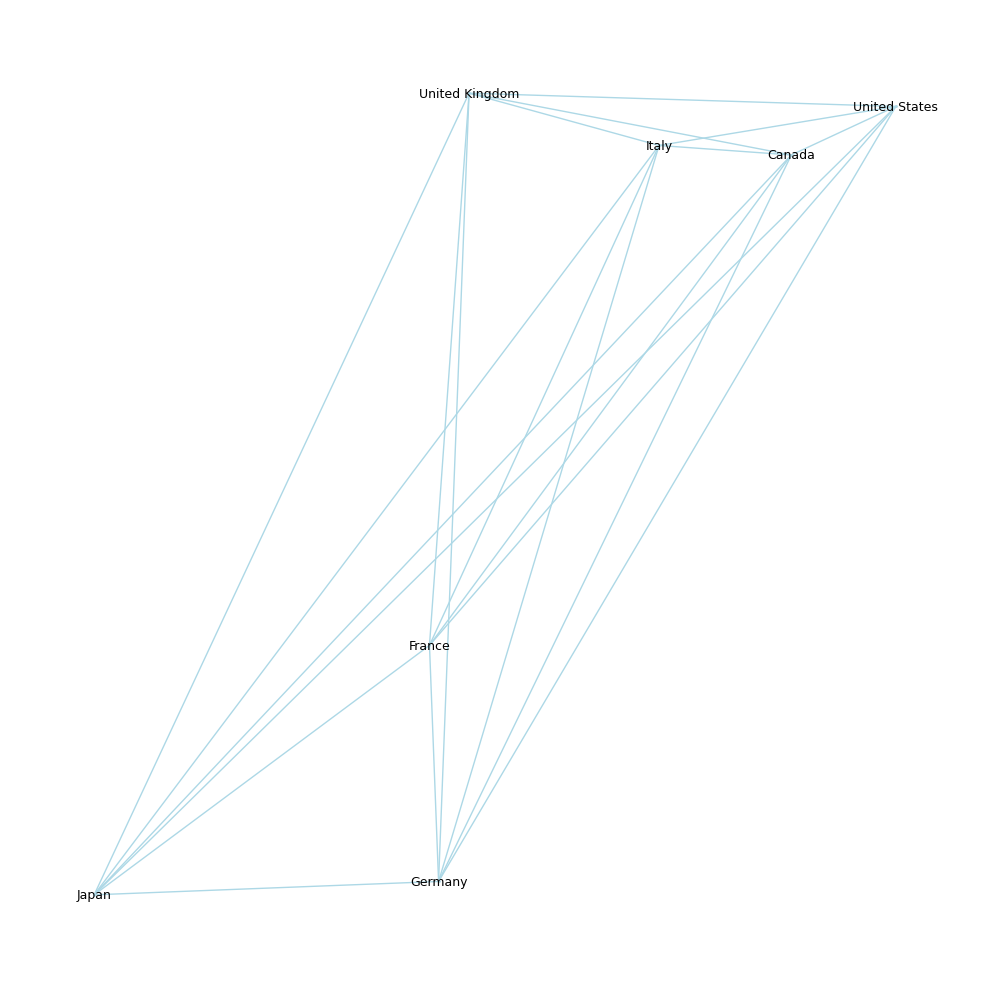

In [88]:
# Spring 
#Setting size and colours
options = {
'node_color': 'lightblue',
  'edge_color': 'lightblue',
'node_size': 1,
'width': 1,
'alpha': 1.0,
 }

# Producing the network
plt.subplots(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9) #Revised: removed: , **options
plt.tight_layout()
plt.axis('off');
plt.show()

/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_1652/2762485040.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


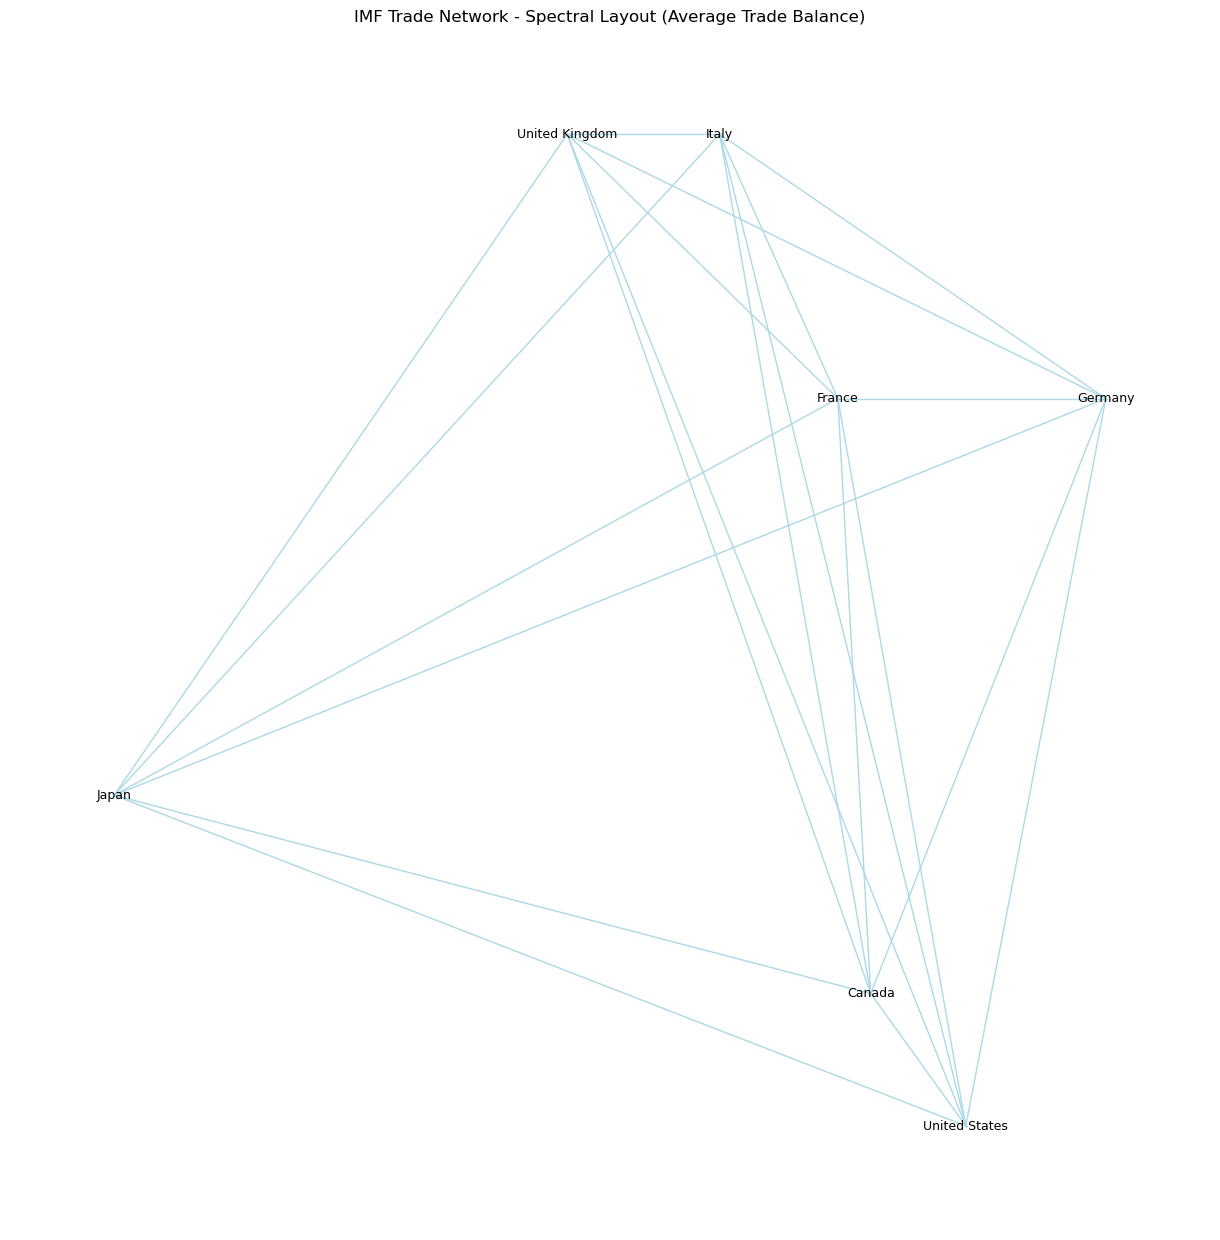

In [92]:
# spectral 
pos = nx.spectral_layout(G)

# Plot
plt.figure(figsize=(12, 12))
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.title('IMF Trade Network - Spectral Layout (Average Trade Balance)')
plt.axis('off')
plt.tight_layout()
plt.show()

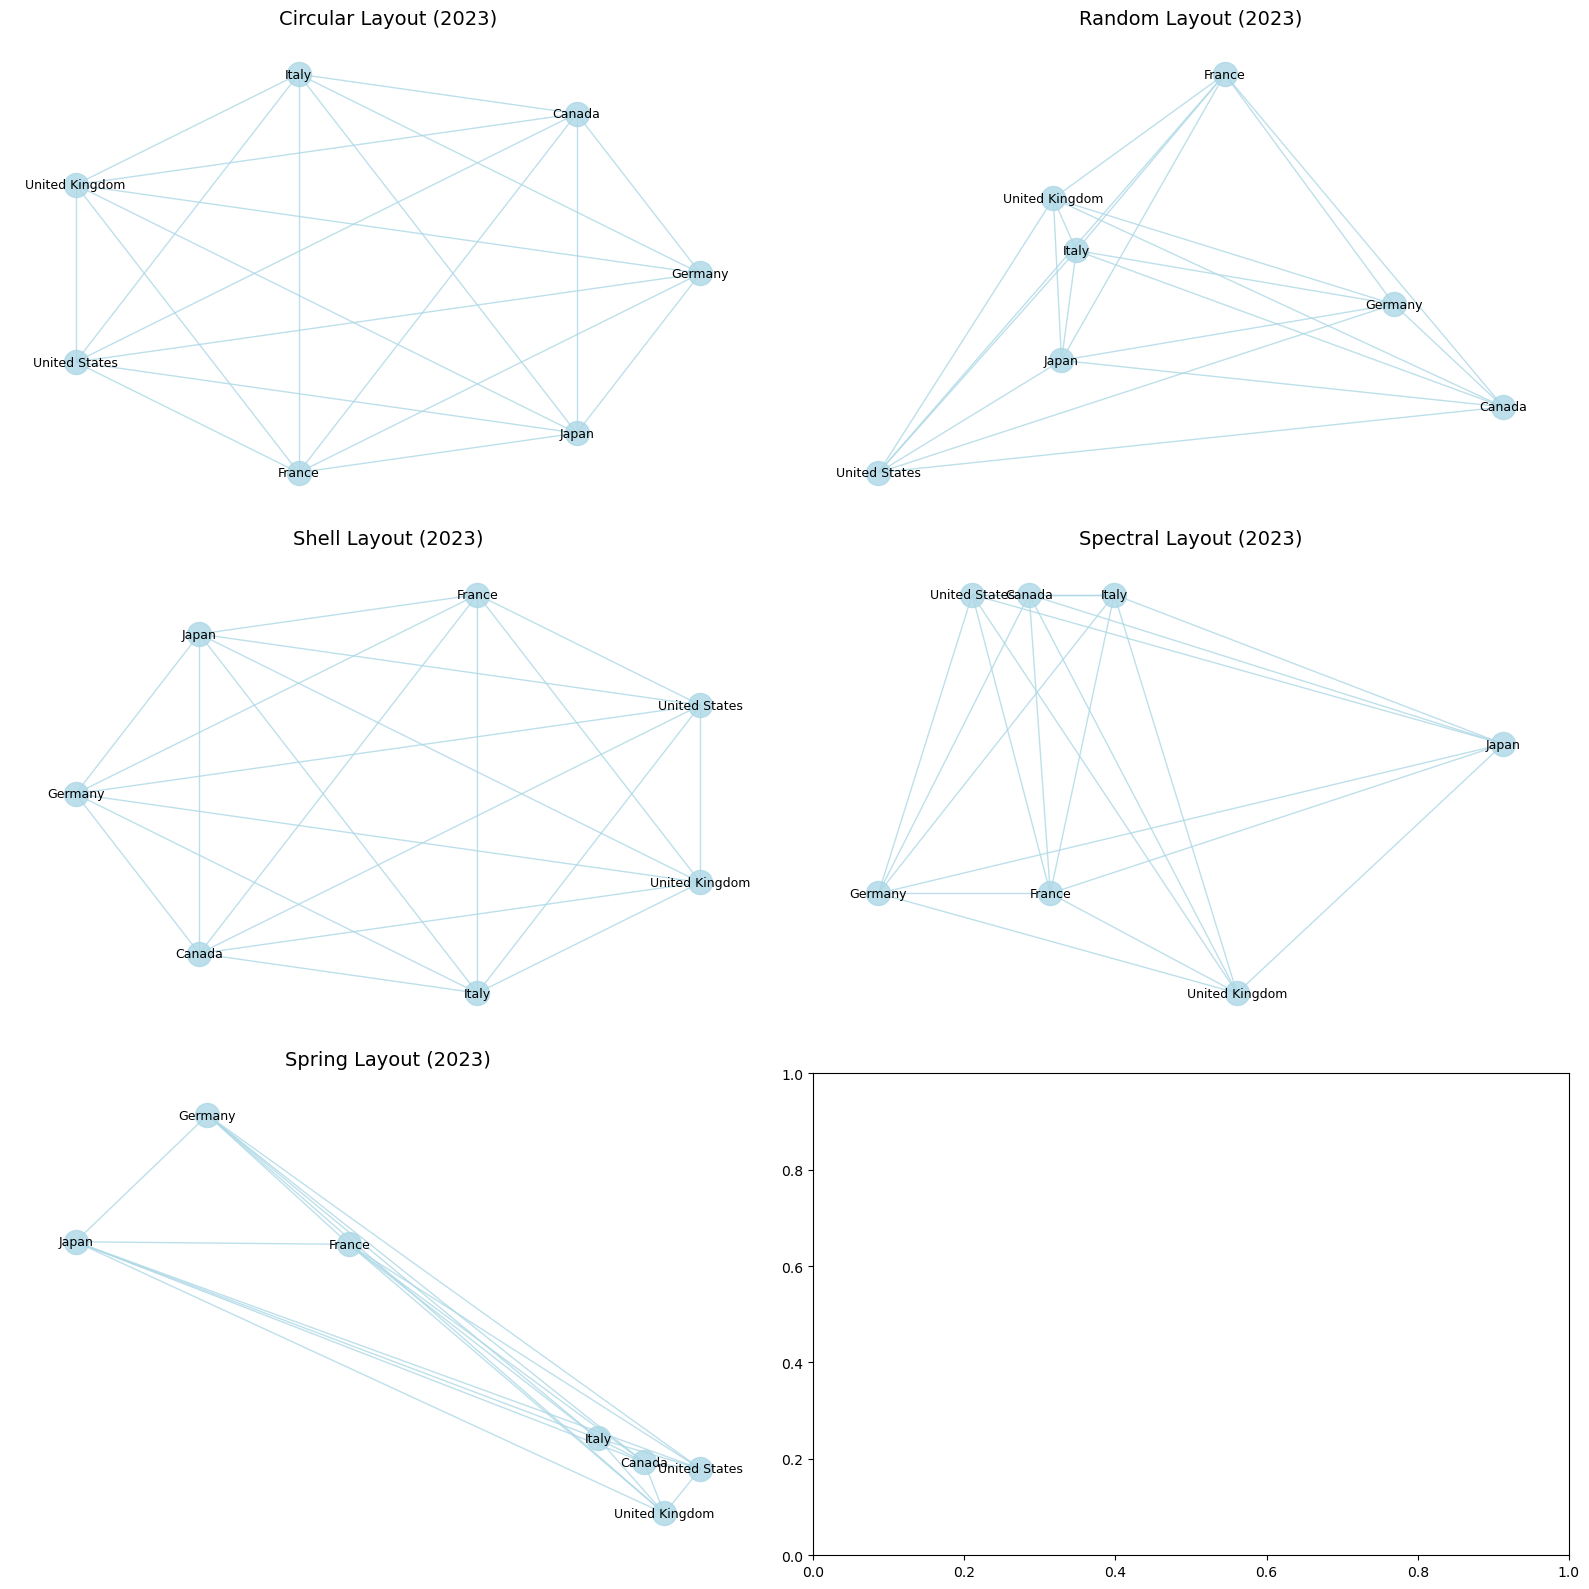

In [96]:
# Q3

year = '2023'
df_2023 = imf[['COUNTRY', 'COUNTERPART_COUNTRY', year]].dropna()
df_2023 = df_2023[df_2023[year] != 0]

# Build the graph for 2023
G = nx.Graph()
for _, row in df_2023.iterrows():
    G.add_edge(row['COUNTRY'], row['COUNTERPART_COUNTRY'], weight=row[year])

# Remove isolated nodes
isolated = [node for node, degree in G.degree() if degree == 0]
G.remove_nodes_from(isolated)

# Common draw options
options = {
    'node_color': 'lightblue',
    'edge_color': 'lightblue',
    'node_size': 300,
    'width': 1,
    'alpha': 0.8,
}

# Prepare layouts
layouts = {
    'Circular': nx.circular_layout(G),
    'Random': nx.random_layout(G),
    'Shell': nx.shell_layout(G),
    'Spectral': nx.spectral_layout(G),
    'Spring': nx.spring_layout(G),
}

# Create 2x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

axes = axes.flatten()  # flatten for easy indexing

for i, (layout_name, pos) in enumerate(layouts.items()):
    plt.sca(axes[i])  # set current axes
    nx.draw(G, pos=pos, font_size=9, **options)
    nx.draw_networkx_labels(G, pos=pos, font_size=9)
    axes[i].set_title(f'{layout_name} Layout (2023)', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()